## 20200923-181126-network-RMSprop

In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.data_preprocess as preprocess
from utils.model_metrics import ModelMetric
from utils.mode_figure import ModelFigre
import datetime
from utils.model_callback import step_decay, exp_decay, MyStopTrainCallBack
import utils.network.best as model

In [2]:
modelmetric = ModelMetric()

In [3]:
net = model.BestLstmModel()

In [4]:
# algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, clipnorm=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
algorithm = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.95, clipnorm=0.9, nesterov=True, name='SGD')
net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=modelmetric.metric('binary_crossentropy')) # categorical_crossentropy

In [5]:
from tensorflow.keras import callbacks
dir_name = datetime.datetime.now().strftime("Best-%Y%m%d-%H%M%S-SGD")

logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
lrate = callbacks.LearningRateScheduler(exp_decay)
csv_log = tf.keras.callbacks.CSVLogger('../model_record/'+dir_name+"/log", separator=',', append=False)
if not os.path.isdir('../model_record/'+dir_name):
    os.mkdir('../model_record/'+dir_name)
# stop_train = MyStopTrainCallBack()
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [6]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()
X_train = tf.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = tf.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [7]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log, lrate], verbose=1) # lrate

9.0000 - val_fp: 5659.0000 - val_tn: 139809.0000 - val_fn: 5659.0000 - val_acc: 0.0000e+00 - val_precision: 0.9611 - val_recall: 0.9611 - val_auc: 0.9945 - val_binary_accuracy: 0.9611 - val_binary_crossentropy: 0.0954 - lr: 0.0000e+00
Epoch 65/100
663/663 [==============================] - 17s 26ms/step - loss: 0.1091 - tp: 325275.0000 - fp: 14149.0000 - tn: 325275.0000 - fn: 14149.0000 - acc: 0.0000e+00 - precision: 0.9583 - recall: 0.9583 - auc: 0.9924 - binary_accuracy: 0.9583 - binary_crossentropy: 0.1091 - val_loss: 0.0952 - val_tp: 139803.0000 - val_fp: 5665.0000 - val_tn: 139803.0000 - val_fn: 5665.0000 - val_acc: 0.0000e+00 - val_precision: 0.9611 - val_recall: 0.9611 - val_auc: 0.9945 - val_binary_accuracy: 0.9611 - val_binary_crossentropy: 0.0952 - lr: 0.0000e+00
Epoch 66/100
663/663 [==============================] - 19s 28ms/step - loss: 0.1089 - tp: 325425.0000 - fp: 13999.0000 - tn: 325425.0000 - fn: 13999.0000 - acc: 0.0000e+00 - precision: 0.9588 - recall: 0.9588 - auc:

In [8]:
results  = net.evaluate(X_test, y_test, verbose=1)
modelmetric.getTrainMetricValue(net, results)

6495/6495 [==============================] - 68s 10ms/step - loss: 0.0941 - tp: 199835.0000 - fp: 7976.0000 - tn: 199835.0000 - fn: 7976.0000 - acc: 0.0000e+00 - precision: 0.9616 - recall: 0.9616 - auc: 0.9947 - binary_accuracy: 0.9616 - binary_crossentropy: 0.0941
loss :  0.09409674257040024
tp :  199835.0
fp :  7976.0
tn :  199835.0
fn :  7976.0
acc :  0.0
precision :  0.961618959903717
recall :  0.961618959903717
auc :  0.9946655035018921
binary_accuracy :  0.961618959903717
binary_crossentropy :  0.09409674257040024


In [9]:
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
modelmetric.confusion_matrix(y_label, y_class)
modelmetric.eva_metric(y_label, y_class)

TrueNegatives result:  125322.0
TruePositives result:  74513.0
FalseNegatives result:  1365.0
FalsePositives result:  6611.0
Recall result:  0.9820106
Precision result:  0.91850746


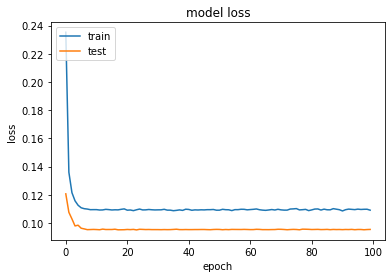

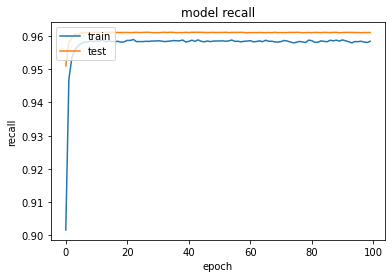

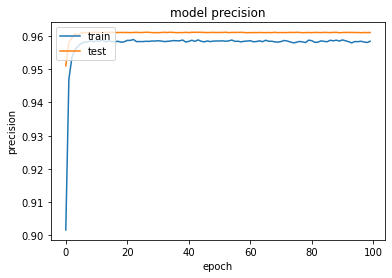

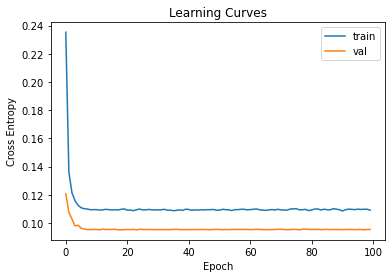

In [10]:
mf = ModelFigre("../model_record", dir_name, model_)
mf.loss_graph()
mf.recall_graph()
mf.precision_graph()
mf.cross_entropy_graph()
# fig.save_model(net,dir_name)

In [11]:
# net.save_weights('../model_record/'+dir_name+'/model/model.weight')

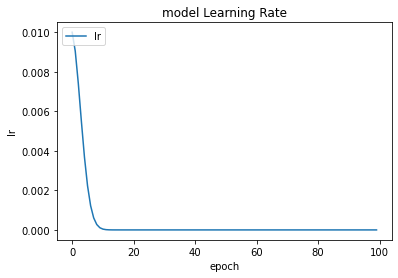

In [12]:
mf.lr_graph()